# Exploratory Data Analysis

## Initial Settings
- Importing packages and dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=0.8)
sns.set_palette('tab10')
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = os.path.join('..', 'data', 'dcard-post-train.csv')
df = pd.read_csv(path)

---

## Basic Info
- **50000 rows x 18 columns**
- 17 factors + 1 outcome `like_count_24h`
- **No missing value**
- data type:
    - `title`: _object_
    - `created_at`: _object_ (seems to be **_datetime_**)
    - `like_count` / `comment_count`: _integer_
    - `forum_id` / `author_id`: _integer_ (seems to be **_category_**)
    - `forum_stats`: _float_

In [3]:
df.head()

,title,created_at,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats,like_count_24h
0,我的排骨湯,2022-10-05 14:20:21 UTC,12,15,15,15,16,18,10,10,10,10,10,10,598518,428921,0.7,26
1,#請益 婚禮穿搭,2022-10-05 14:28:13 UTC,0,0,3,4,4,4,2,5,8,9,9,9,399302,650840,63.9,11
2,無謂的啦啦隊,2022-10-06 07:18:22 UTC,3,7,8,11,12,14,1,1,2,3,3,3,650776,717288,19.2,19
3,文學理論 課本,2022-09-20 11:39:14 UTC,2,7,11,24,26,26,2,2,8,32,38,63,471023,173889,7.9,29
4,一般課程,2022-09-05 10:18:24 UTC,3,7,7,10,10,11,15,26,35,38,48,49,230184,594332,36.2,16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             50000 non-null  object 
 1   created_at        50000 non-null  object 
 2   like_count_1h     50000 non-null  int64  
 3   like_count_2h     50000 non-null  int64  
 4   like_count_3h     50000 non-null  int64  
 5   like_count_4h     50000 non-null  int64  
 6   like_count_5h     50000 non-null  int64  
 7   like_count_6h     50000 non-null  int64  
 8   comment_count_1h  50000 non-null  int64  
 9   comment_count_2h  50000 non-null  int64  
 10  comment_count_3h  50000 non-null  int64  
 11  comment_count_4h  50000 non-null  int64  
 12  comment_count_5h  50000 non-null  int64  
 13  comment_count_6h  50000 non-null  int64  
 14  forum_id          50000 non-null  int64  
 15  author_id         50000 non-null  int64  
 16  forum_stats       50000 non-null  float6

In [5]:
df.describe()

,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats,like_count_24h
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,3.097500,5.224340,7.67098,10.249960,12.733960,15.048340,4.463440,6.798680,9.004460,11.088480,12.993100,14.726880,477643.067400,498339.91460,116.125080,45.194840
std,19.274621,24.516945,29.24685,35.367611,43.009398,51.984946,51.510914,60.982037,69.300161,77.946028,87.371928,99.403843,286979.254083,289767.40654,206.109233,180.888108
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,321.000000,2.00000,0.000000,5.000000
25%,0.000000,1.000000,2.00000,2.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,174372.000000,243660.75000,16.300000,7.000000
50%,1.000000,3.000000,4.00000,5.000000,5.000000,6.000000,1.000000,3.000000,4.000000,5.000000,5.000000,6.000000,497426.000000,501998.00000,38.000000,13.000000
75%,3.000000,5.000000,7.00000,9.000000,11.000000,12.000000,4.000000,6.000000,9.000000,11.000000,13.000000,14.000000,717594.000000,751721.50000,93.700000,30.000000
max,4044.000000,4797.000000,5098.00000,5362.000000,5822.000000,6588.000000,4902.000000,4923.000000,4928.000000,4928.000000,5969.000000,8031.000000,998778.000000,999998.00000,1128.300000,13297.000000


---

## Data Cleaning

### Duplicates
- **No duplicate**
- **842 duplicates** (by title)

In [6]:
df.duplicated().sum()

0

In [7]:
df.duplicated('title').sum()

842

### Data Types

- `created_at` should be converted into **_datetime_ with UTC+8** (from UTC to ROC time zone).
- `forum_id` and `author_id` should be converted into **_category_**.

In [8]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.tz_convert(tz='ROC')
df[['forum_id', 'author_id']] = df[['forum_id', 'author_id']].astype('category')

df.dtypes

title                            object
created_at          datetime64[ns, ROC]
like_count_1h                     int64
like_count_2h                     int64
like_count_3h                     int64
like_count_4h                     int64
like_count_5h                     int64
like_count_6h                     int64
comment_count_1h                  int64
comment_count_2h                  int64
comment_count_3h                  int64
comment_count_4h                  int64
comment_count_5h                  int64
comment_count_6h                  int64
forum_id                       category
author_id                      category
forum_stats                     float64
like_count_24h                    int64
dtype: object

---

## Feature Engineering

### title
- Six titles are used more than 10 times, some of which are meaningless.
- **1.07% of titles are meaningless**(, which do not contain three consecutive alphabets or two consecutive Chinese words).

<span style="color:red">**>>> We could separate meaningful and meaningless `title`s.**</span>

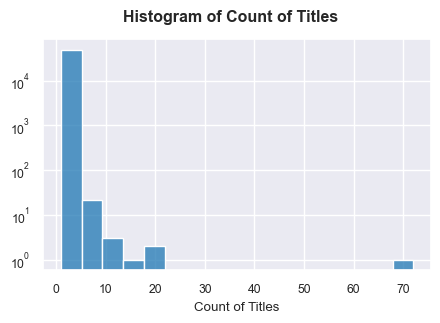

In [9]:
ntitle = df['title'].value_counts()

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.histplot(x=ntitle)

g.set_yscale('log')
g.set(xlabel='Count of Titles', ylabel=None)
plt.suptitle('Histogram of Count of Titles', size='large', weight='bold')

plt.show()

In [10]:
print('Top 10 Titles')
print('-'*15)

for i in range(10):
    title = ntitle.index[i]
    count = ntitle.iloc[i,]
    
    print(f'{i+1:>2}. {title}: {count}')

Top 10 Titles
---------------
 1. .: 72
 2. 推甄請益: 19
 3. (´･ω･`): 18
 4. 地震: 16
 5. 學餐: 12
 6. 請問這是什麼車: 11
 7. 金天: 10
 8. 電梯: 9
 9. ...: 9
10. 。: 8


In [11]:
title = df['title'].str.replace(' ', '')
ind_alpha = title.str.contains('[A-Za-z]'*3, regex=True)
ind_chn = title.str.contains('[\u4e00-\u9FFF]'*2, regex=True)
title_wo_mean = tuple(title[~(ind_alpha|ind_chn)])

print('Number of Titles w/o Meaning:', len(title_wo_mean))
print('e.g.', title_wo_mean[:10])

Number of Titles w/o Meaning: 536
e.g. ('.', '😭', '⚠️', '_(:3」∠)_', '？？？', '101', '.', '2022F1', '(´;︵;`)', '蛤')


### created_at
- Time range of posts is between 2022-09-01 8AM and 2022-10-30 8AM, which is eight weeks and three more days (**5.12% of posts come from last 72 hours)**.

<ins>_(Below are analyzed by post-cleaning data)_<ins>

- Posting follows a weekly cycle where users tend to make posts on **weekdays** rather than weekends.
- Within a day, users make **more posts in the evening and fewer posts at midnight**. It reflects people's quitting time and bedtime in Taiwan.
    
<span style="color:red">**>>> We could trim `created_at` into complete weeks and extract _hour_ and _weekday_.**</span>

In [12]:
df['created_at'].describe()

count                                  50000
mean     2022-09-30 16:42:25.855500032+08:00
min                2022-09-01 08:02:34+08:00
25%         2022-09-15 17:50:38.500000+08:00
50%         2022-09-30 11:28:50.500000+08:00
75%         2022-10-15 21:06:29.500000+08:00
max                2022-10-30 07:59:35+08:00
Name: created_at, dtype: object

In [13]:
dt = '2022-10-27 07:59:59+08:00'
df_create = df[df['created_at'] <= dt]

print('Number of Posts in Complete Eight Weeks:', len(df_create))

Number of Posts in Complete Eight Weeks: 47440


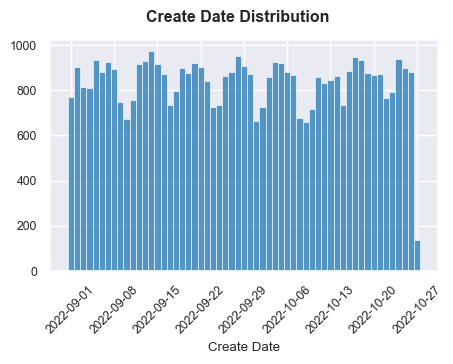

In [14]:
create_date = df_create['created_at'].dt.date

fig, ax = plt.subplots(figsize=(5, 3))
bins = pd.date_range(start=min(create_date), end=max(create_date), freq='D')
g = sns.histplot(x=create_date, bins=bins)

g.set(xlabel='Create Date', ylabel=None)
xticks = pd.date_range(start=min(create_date), end=max(create_date), freq='7D').date
g.set_xticks(xticks, labels=xticks, rotation=45)
plt.suptitle('Create Date Distribution', size='large', weight='bold')

plt.show()

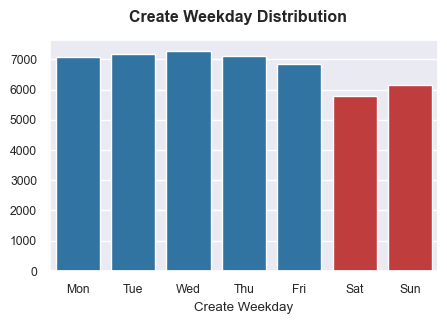

In [15]:
wkday = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

create_wkday = df_create['created_at'].dt.weekday.sort_values()
create_wkday = create_wkday.replace(wkday)
ncreate_wkday = create_wkday.value_counts(sort=False)

fig, ax = plt.subplots(figsize=(5, 3))
cols = ['#d62728' if x < ncreate_wkday.quantile(0.3) else '#1f77b4' for x in ncreate_wkday]
g = sns.barplot(x=ncreate_wkday.index, y=ncreate_wkday, palette=cols)

g.set(xlabel='Create Weekday', ylabel=None)
plt.suptitle('Create Weekday Distribution', size='large', weight='bold')

plt.show()

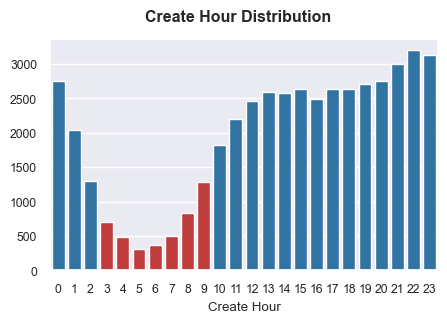

In [16]:
create_hr = df_create['created_at'].dt.hour.sort_values()
ncreate_hr = create_hr.value_counts(sort=False)

fig, ax = plt.subplots(figsize=(5, 3))
cols = ['#d62728' if x < ncreate_hr.quantile(0.3) else '#1f77b4' for x in ncreate_hr]
g = sns.barplot(x=ncreate_hr.index, y=ncreate_hr, palette=cols)

g.set(xlabel='Create Hour', ylabel=None)
plt.suptitle('Create Hour Distribution', size='large', weight='bold')

plt.show()

### like_count
- All `like_count`s are **long-tailed distributions**.
- Within three practices (normal / deduction / division), **normal** version has the highest correlation.

<span style="color:red">**>>> We could log transform all `like_count`s.**</span>

In [17]:
# df_like
df_like = df.filter(regex='like')

cols = []
for col in df_like.columns:
    cols.append(col.replace('like_count_', ''))
df_like.columns = cols

# df_like (deduction)
df_like_ded = df_like.copy(deep=True)

for i in range(6):
    minuend = df_like_ded.columns[i + 1]
    subtrahend  = df_like_ded.columns[i]
    
    df_like_ded[minuend + '-' + subtrahend] = df_like_ded[minuend] - df_like_ded[subtrahend]

df_like_ded.drop(df_like.columns, axis=1, inplace=True)

# df_like (division)
df_like_div = df_like.copy(deep=True)

for i in range(6):
    minuend = df_like_div.columns[i + 1]
    subtrahend  = df_like_div.columns[i]
    
    df_like_div[minuend + '/' + subtrahend] = df_like_div[minuend] / df_like_div[subtrahend]
    
df_like_div.drop(df_like.columns, axis=1, inplace=True)
df_like_div = df_like_div.replace(np.nan, 0).replace(np.inf, 0)

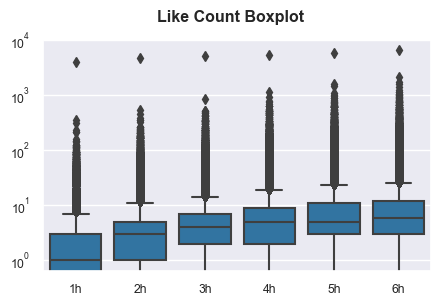

In [18]:
df_like_wo_24 = df_like.drop('24h', axis=1)

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.boxplot(data=df_like_wo_24, color='#1f77b4')

g.set_yscale('log')
g.set(xlabel=None, ylabel=None)
plt.suptitle('Like Count Boxplot', size='large', weight='bold')

plt.show()

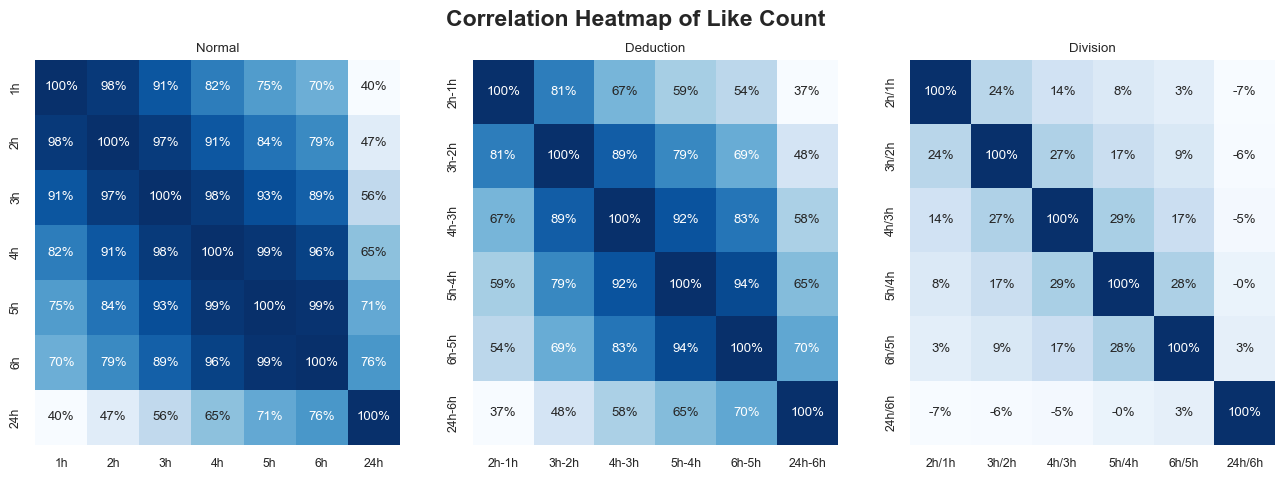

In [19]:
like_dict = {'Normal': df_like, 'Deduction': df_like_ded, 'Division': df_like_div}
fig, axes = plt.subplots(1, 3, figsize=(16,5))

for i in range(3):
    key = list(like_dict.keys())[i]
    value = list(like_dict.values())[i]
    
    corr = value.corr()
    g = sns.heatmap(ax=axes[i], data=corr, cmap='Blues', annot=True, fmt='.0%', cbar=False)
    g.set(title=key)

plt.suptitle('Correlation Heatmap of Like Count', size='xx-large', weight='bold')

plt.show()

### comment_count
- All `comment_count`s are **long-tailed distributions**.
- Within three practices (normal / deduction / division), division version has the highest correlation, **but still low**.

<span style="color:red">**>>> We could try dividing all `comment_count`s or just discarding them.**</span>

In [20]:
# df_cmt
df_cmt = df.filter(regex='comment')
df_cmt['log(like)'] = np.log10(df['like_count_24h'])

cols = []
for col in df_cmt.columns:
    cols.append(col.replace('comment_count_', ''))
df_cmt.columns = cols

# df_cmt (deduction)
df_cmt_ded = df_cmt.copy(deep=True)

for i in range(5):
    minuend = df_cmt_ded.columns[i + 1]
    subtrahend  = df_cmt_ded.columns[i]
    
    df_cmt_ded[minuend + '-' + subtrahend] = df_cmt_ded[minuend] - df_cmt_ded[subtrahend]

df_cmt_ded.drop(df_cmt.columns, axis=1, inplace=True)
df_cmt_ded['log(like)'] = np.log10(df['like_count_24h'])

# df_cmt (division)
df_cmt_div = df_cmt.copy(deep=True)

for i in range(5):
    minuend = df_cmt_div.columns[i + 1]
    subtrahend  = df_cmt_div.columns[i]
    
    df_cmt_div[minuend + '/' + subtrahend] = df_cmt_div[minuend] / df_cmt_div[subtrahend]
    
df_cmt_div.drop(df_cmt.columns, axis=1, inplace=True)
df_cmt_div = df_cmt_div.replace(np.nan, 0).replace(np.inf, 0)
df_cmt_div['log(like)'] = np.log10(df['like_count_24h'])

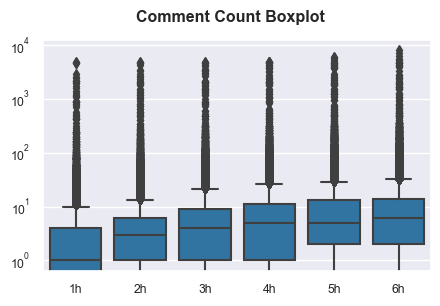

In [21]:
df_cmt_wo_24 = df_cmt.drop('log(like)', axis=1)

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.boxplot(data=df_cmt_wo_24, color='#1f77b4')

g.set_yscale('log')
g.set(xlabel=None, ylabel=None)
plt.suptitle('Comment Count Boxplot', size='large', weight='bold')

plt.show()

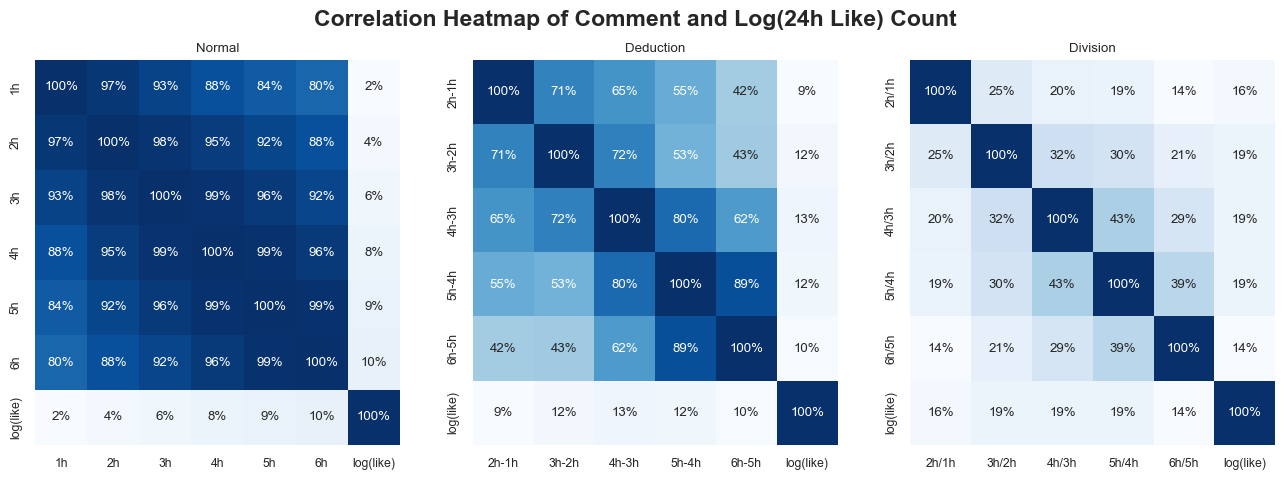

In [22]:
cmt_dict = {'Normal': df_cmt, 'Deduction': df_cmt_ded, 'Division': df_cmt_div}
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i in range(3):
    key = list(cmt_dict.keys())[i]
    value = list(cmt_dict.values())[i]
    
    corr = value.corr()
    g = sns.heatmap(ax=axes[i], data=corr, cmap='Blues', annot=True, fmt='.0%', cbar=False)
    g.set(title=key)

plt.suptitle('Correlation Heatmap of Comment and Log(24h Like) Count', size='xx-large', weight='bold')

plt.show()

### forum_id / forum_stats

#### Relationship
- Most of `forum_id` and `forum_stats` are of **one-to-one relationshop**, except for two samples of ID 47568, which could be ignored and adjusted.
- `forum_stats` seems to have a **slight influence** on predicting 24-hour like count.

<span style="color:red">**>>> We could discard `forum_stats` and only use `forum_id` as the indicator of forum instead.**</span>

In [23]:
df_forum = df[['forum_id', 'forum_stats']]
nstats_id = df_forum.groupby('forum_id')['forum_stats'].nunique()
one_to_many_id = nstats_id[nstats_id > 1]

print('One-to-Many ID')
print('-'*15)

for i in range(len(one_to_many_id)):
    id = one_to_many_id.index[i]
    
    print(id)

One-to-Many ID
---------------
47568


In [24]:
print('ID 47568\'s Stats')
print('-'*15)

ind = (df_forum['forum_id'] == 47568)
nstats = df_forum[ind]['forum_stats'].value_counts()

for i in range(len(nstats)):
    id = nstats.index[i]
    n = nstats.iloc[i,]
    
    print(f'{id:>4}: {n:>2}')

ID 47568's Stats
---------------
18.2: 15
 0.1:  2


In [25]:
df_forum_like = df[['forum_id', 'forum_stats', 'like_count_24h']]
df_forum_like_id = df_forum_like.groupby('forum_id')[['forum_stats', 'like_count_24h']].median()
df_forum_like_id['like_count_24h_log'] = np.log10(df_forum_like_id['like_count_24h'])

corr = df_forum_like_id['forum_stats'].corr(df_forum_like_id['like_count_24h_log'])

print('Correlation of forum_stats and log(like_count_24h):', round(corr, 2))

Correlation of forum_stats and log(like_count_24h): -0.02


#### forum_id
- Using 90th percentile of count of forums as a splitter, **9.85% of forums are popular**, and **79.99% of posts are from popular forums**.

<span style="color:red">**>>> We could separate popular and unpopular `forum_id`s**.</span>

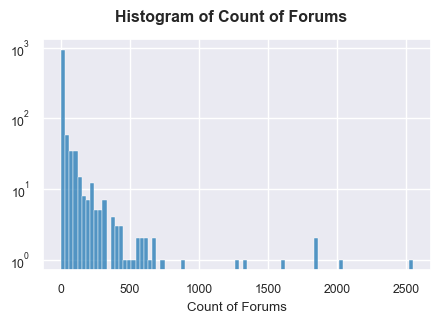

In [26]:
nforum = df['forum_id'].value_counts()

fig, ax = plt.subplots(figsize=(5, 3))
bins = np.arange(min(nforum), max(nforum) + 30, 30)
g = sns.histplot(x=nforum, bins=bins)

g.set_yscale('log')
g.set(xlabel='Count of Forums', ylabel=None)
plt.suptitle('Histogram of Count of Forums', size='large', weight='bold')

plt.show()

In [27]:
n = nforum.quantile(0.9)
nforum_more = nforum[nforum > n]
nforum_less = nforum[nforum <= n]

print('90th Percentile of Count of Forums:', int(n))
print('-'*15)
print(len(nforum_more), 'Popular Forums')
print(len(nforum_less), 'Unpopular Forums')
print(sum(nforum_more), 'Posts from Popular Forums')
print(sum(nforum_less), 'Posts from Unpopular Forums')

90th Percentile of Count of Forums: 97
---------------
113 Popular Forums
1034 Unpopular Forums
39993 Posts from Popular Forums
10007 Posts from Unpopular Forums


### author_id
- **Most authors make only one post**.

<span style="color:red">**>>> We could discard `author_id` to reduce dimensions**.</span>

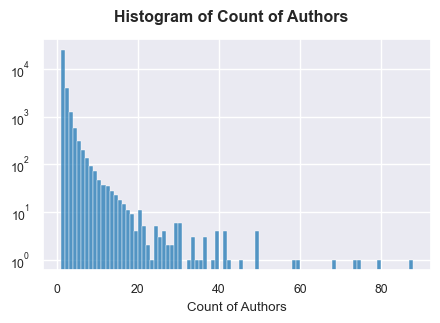

In [28]:
nauthor = df['author_id'].value_counts()

fig, ax = plt.subplots(figsize=(5, 3))
bins = np.arange(min(nauthor), max(nauthor) + 1, 1)
g = sns.histplot(x=nauthor, bins=bins)

g.set_yscale('log')
g.set(xlabel='Count of Authors', ylabel=None)
plt.suptitle('Histogram of Count of Authors', size='large', weight='bold')

plt.show()

In [29]:
n = nauthor.quantile(0.9)
nauthor_more = nauthor[nauthor > n]
nauthor_less = nauthor[nauthor <= n]

print('90th Percentile of Count of Authors:', int(n))
print('-'*15)
print(len(nauthor_more), 'Popular Authors')
print(len(nauthor_less), 'Unpopular Authors')
print(sum(nauthor_more), 'Posts from Popular Authors')
print(sum(nauthor_less), 'Posts from Unpopular Authors')

90th Percentile of Count of Authors: 2
---------------
2943 Popular Authors
29337 Unpopular Authors
16649 Posts from Popular Authors
33351 Posts from Unpopular Authors
